In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import statsmodels.api as sm # Import statsmodels with the alias 'sm'
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import seaborn as sns

mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False


In [ ]:
!pip install pmdarima
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.3 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/AirQualityUCI.xlsx")

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
# Assuming df is your DataFrame
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Set the new datetime column as index
df.set_index('Datetime', inplace=True)

# Optionally, drop the original Date and Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [ ]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


In [ ]:
print("Missing_values" , df.isnull().sum())

Missing_values CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
df.shape

(9357, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


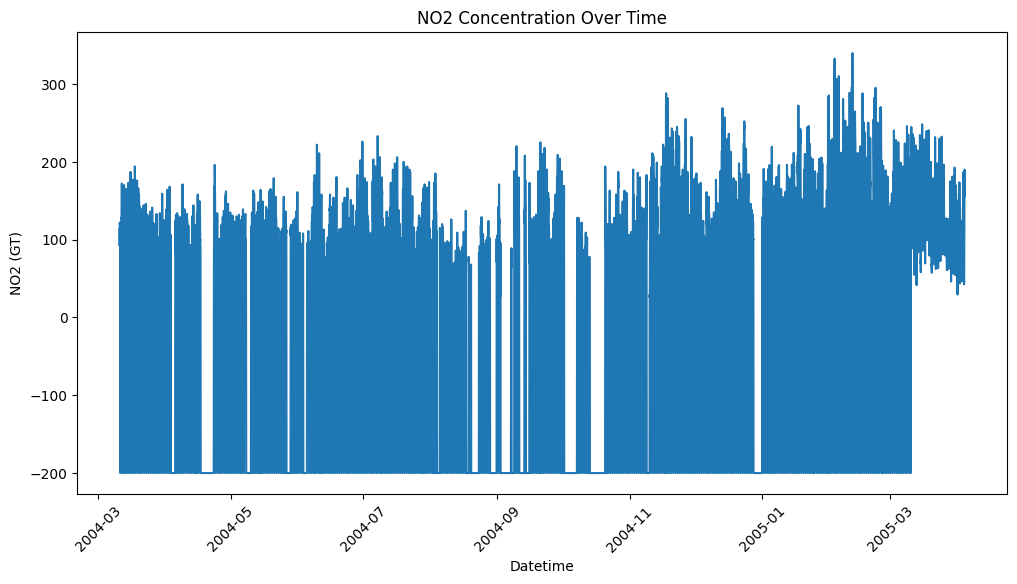

In [ ]:
# Plotting NO2(GT) against the Datetime index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['NO2(GT)'])
plt.xlabel('Datetime')
plt.ylabel('NO2 (GT)')
plt.title('NO2 Concentration Over Time')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

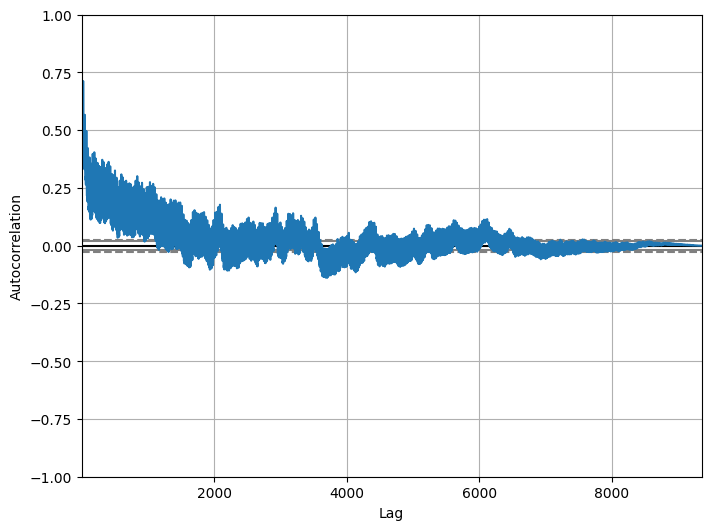

In [ ]:
#plot correlationa and auto correlation for NO2
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['NO2(GT)'])

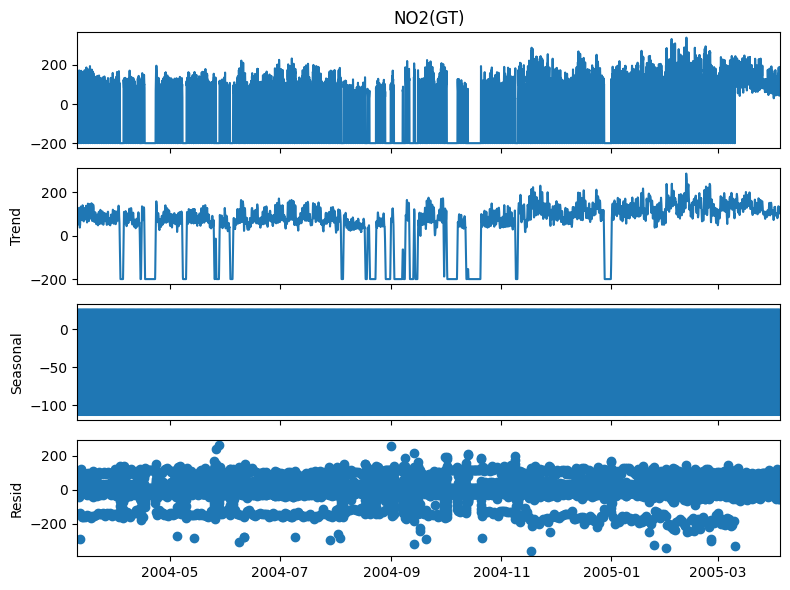

In [ ]:
# perform seasonal decomposition additive
decomposition = sm.tsa.seasonal_decompose(df['NO2(GT)'],period =12)
figure = decomposition.plot()
plt.show()

In [ ]:
##This is definitely not stationary

In [ ]:
##smoothening method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alpha_sm = 0.2

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


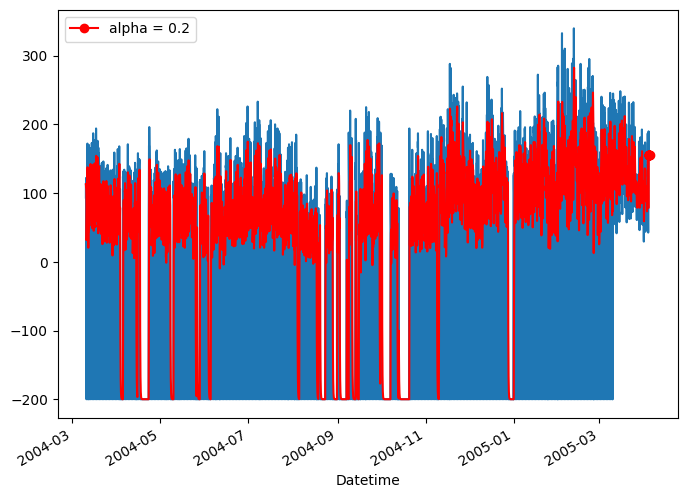

In [ ]:
plt.plot(df.index, df['NO2(GT)'])
fit1 = SimpleExpSmoothing(df['NO2(GT)']).fit(smoothing_level = alpha_sm  ,optimized=False)
fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


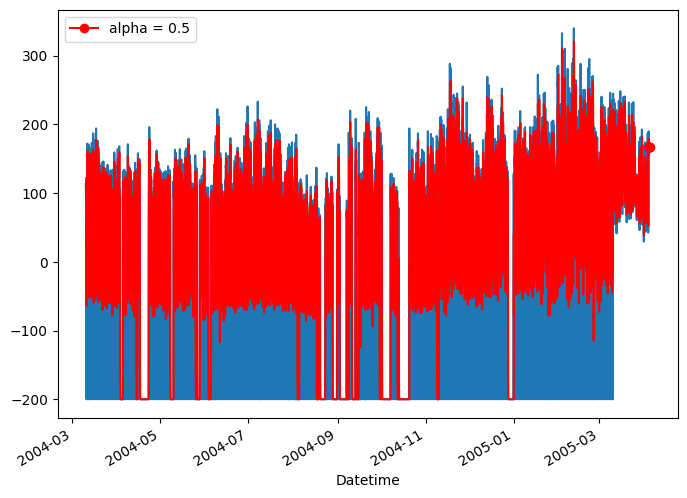

In [ ]:
alpha_sm = 0.5
plt.plot(df.index, df['NO2(GT)'])
fit1 = SimpleExpSmoothing(df['NO2(GT)']).fit(smoothing_level = alpha_sm  ,optimized=False)
fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


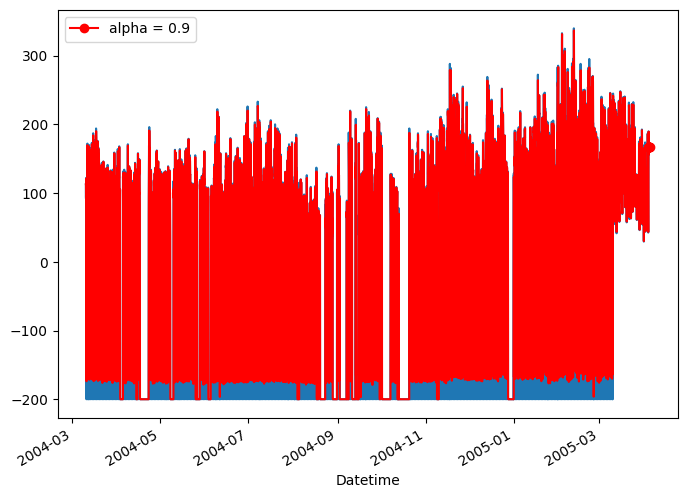

In [ ]:
alpha_sm = 0.9
plt.plot(df.index, df['NO2(GT)'])
fit1 = SimpleExpSmoothing(df['NO2(GT)']).fit(smoothing_level = alpha_sm  ,optimized=False)
fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [ ]:
 #ARMA, ARIMA, ARIMAX, and SARIMAX are all suitable for univariate time series analysis
 #can't use them for determining NO2 since I am considering it to be multivariate time series problem

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def test_stationarity(timeseries, window=12):
    """Plot rolling mean/std and perform ADF test."""
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    # Plot rolling stats
    plt.figure(figsize=(10, 4))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Std Deviation')
    plt.show()

    # Perform Dickey-Fuller test:
    result = adfuller(timeseries.dropna(), autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    print("Stationary" if result[1] < 0.05 else "Non-stationary")
    return result[1] < 0.05

def make_stationary(df, log_transform=True, seasonal_lag=None):
    """Make each feature in multivariate time series stationary."""
    transformed_df = pd.DataFrame()
    for col in df.columns:
        print(f"\nProcessing feature: {col}")
        series = df[col]

        # Step 1: Log Transform (optional)
        if log_transform:
            series = np.log(series + 1)
            print("Applied log transform.")

        # Step 2: Differencing
        series_diff = series.diff().dropna()
        if seasonal_lag:
            series_diff = series_diff.diff(seasonal_lag).dropna()
            print(f"Applied seasonal differencing (lag={seasonal_lag}).")
        else:
            print("Applied first-order differencing.")

        # Step 3: Check stationarity
        print("After transformation:")
        is_stationary = test_stationarity(series_diff)

        if not is_stationary:
            print(f"Warning: {col} might still be non-stationary after transformations.")

        transformed_df[col] = series_diff

    return transformed_df


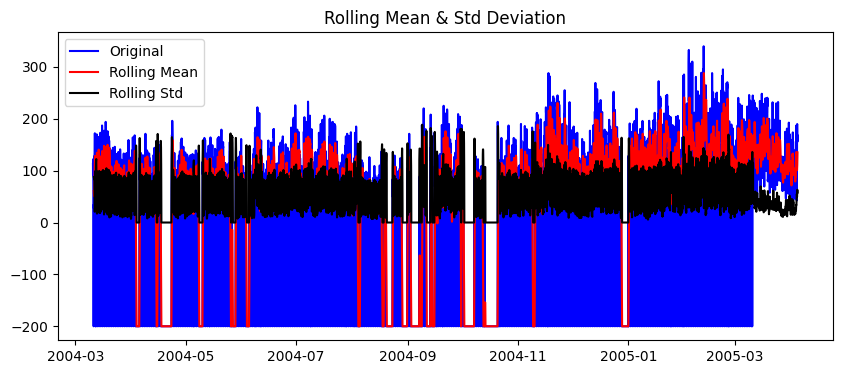

ADF Statistic: -8.987821636785597
p-value: 7.0227299037983026e-15
Critical Value 1%: -3.431051157706947
Critical Value 5%: -2.861849867543536
Critical Value 10%: -2.566934937410664
Stationary


np.True_

In [ ]:
#testinf for stationarity
test_stationarity(df['NO2(GT)'])

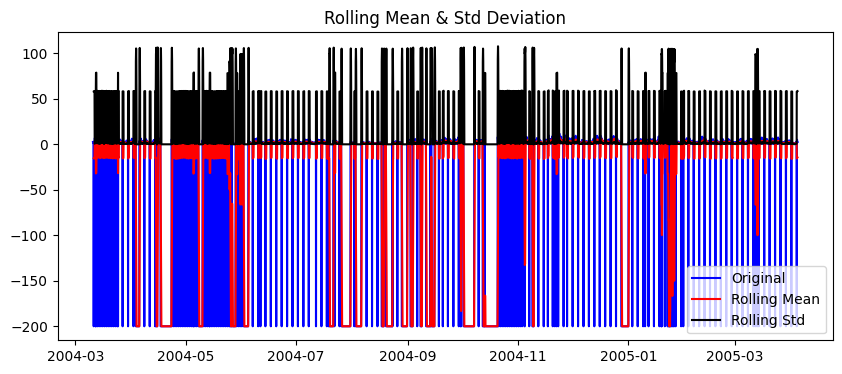

ADF Statistic: -9.552224712392976
p-value: 2.5537621262013337e-16
Critical Value 1%: -3.43105123289464
Critical Value 5%: -2.861849900767839
Critical Value 10%: -2.566934955096094
Stationary


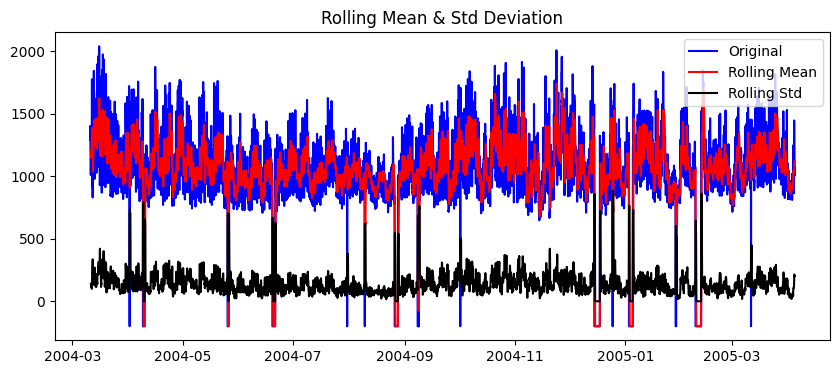

ADF Statistic: -10.69089672442558
p-value: 3.7284315740424585e-19
Critical Value 1%: -3.431051834977192
Critical Value 5%: -2.8618501668189706
Critical Value 10%: -2.5669350967161857
Stationary


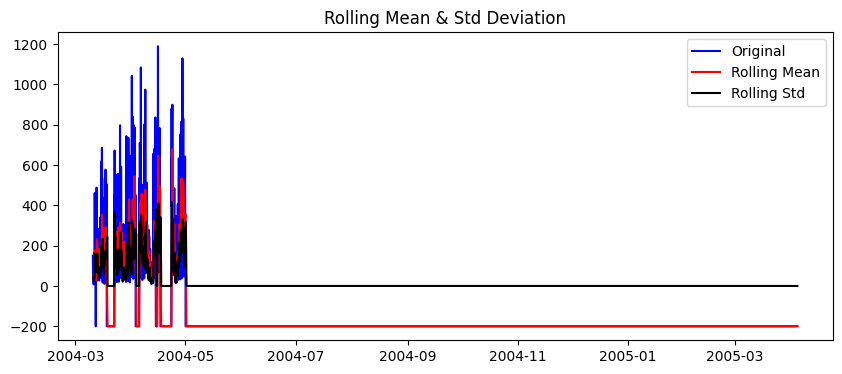

ADF Statistic: -6.391014421452741
p-value: 2.1059313351175037e-08
Critical Value 1%: -3.431051910310215
Critical Value 5%: -2.8618502001074853
Critical Value 10%: -2.566935114435797
Stationary


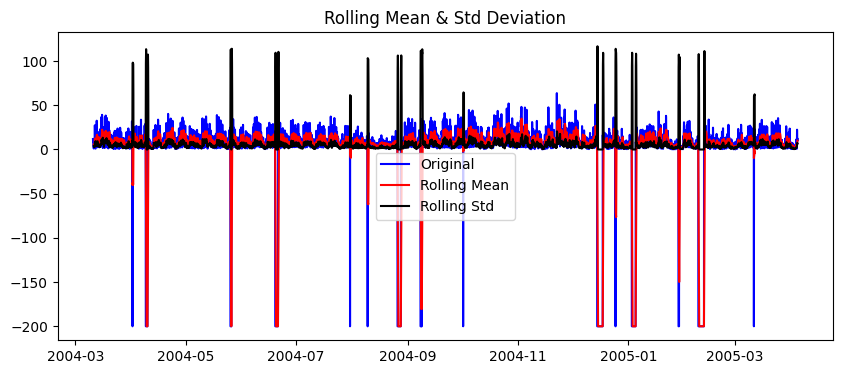

ADF Statistic: -11.032282240514155
p-value: 5.628956025437796e-20
Critical Value 1%: -3.4310510073799216
Critical Value 5%: -2.861849801116297
Critical Value 10%: -2.5669349020511785
Stationary


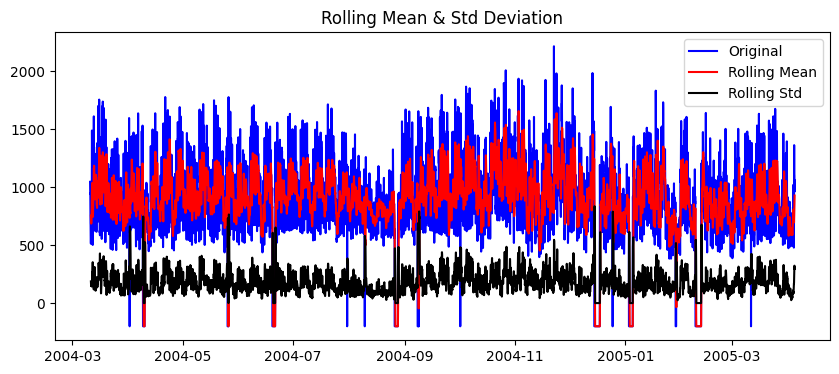

ADF Statistic: -10.58990374606383
p-value: 6.568833892878178e-19
Critical Value 1%: -3.431051910310215
Critical Value 5%: -2.8618502001074853
Critical Value 10%: -2.566935114435797
Stationary


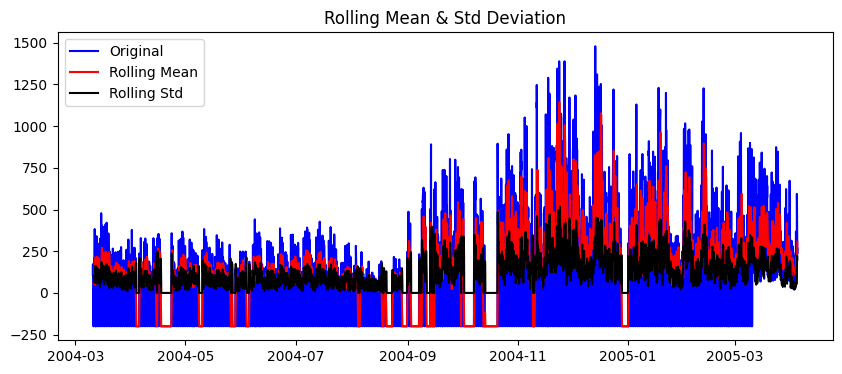

ADF Statistic: -7.727732204778554
p-value: 1.1470358091871469e-11
Critical Value 1%: -3.4310513833184118
Critical Value 5%: -2.861849967237823
Critical Value 10%: -2.5669349904783343
Stationary


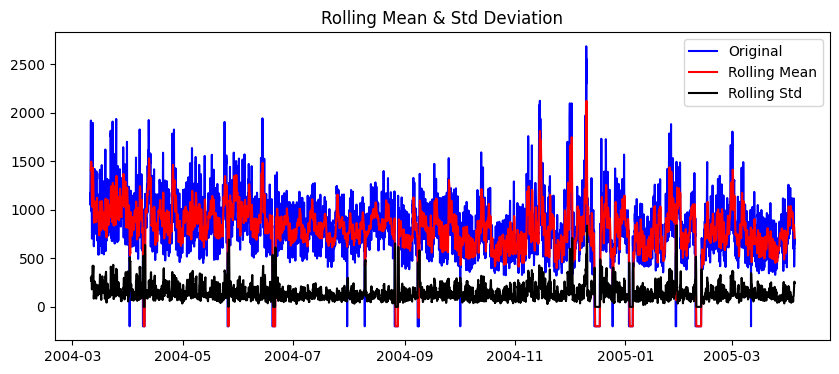

ADF Statistic: -10.709565464938239
p-value: 3.358961780789262e-19
Critical Value 1%: -3.431051985659412
Critical Value 5%: -2.8618502334031457
Critical Value 10%: -2.5669351321592124
Stationary


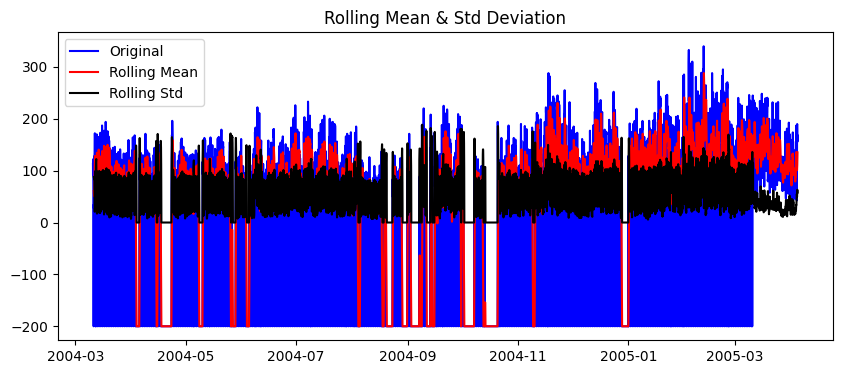

ADF Statistic: -8.987821636785597
p-value: 7.0227299037983026e-15
Critical Value 1%: -3.431051157706947
Critical Value 5%: -2.861849867543536
Critical Value 10%: -2.566934937410664
Stationary


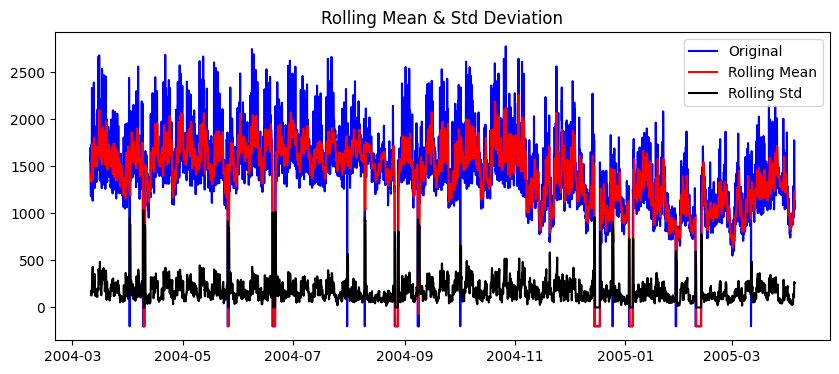

ADF Statistic: -9.201698090859137
p-value: 1.994029390731842e-15
Critical Value 1%: -3.4310513080984597
Critical Value 5%: -2.861849933999267
Critical Value 10%: -2.566934972785317
Stationary


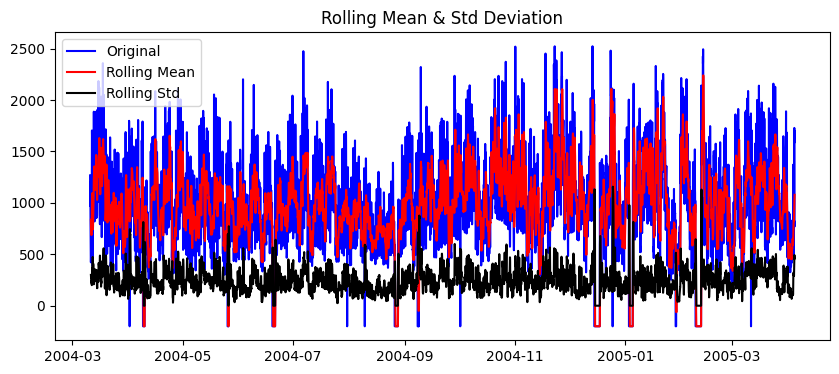

ADF Statistic: -11.400642369592079
p-value: 7.66341074246881e-21
Critical Value 1%: -3.4310513080984597
Critical Value 5%: -2.861849933999267
Critical Value 10%: -2.566934972785317
Stationary


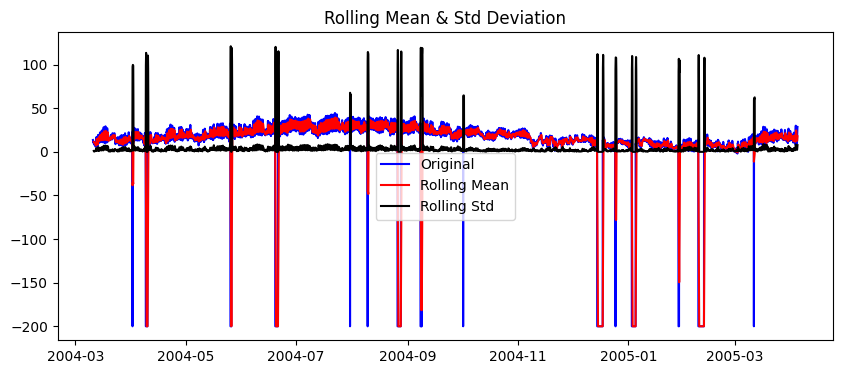

ADF Statistic: -10.952908330840835
p-value: 8.706426303325758e-20
Critical Value 1%: -3.431050181732143
Critical Value 5%: -2.8618494362749733
Critical Value 10%: -2.5669347078446885
Stationary


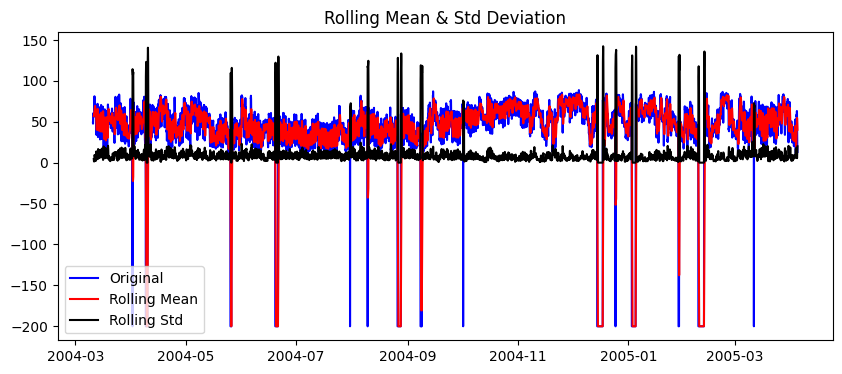

ADF Statistic: -9.996303880086879
p-value: 1.9361623572704047e-17
Critical Value 1%: -3.431051985659412
Critical Value 5%: -2.8618502334031457
Critical Value 10%: -2.5669351321592124
Stationary


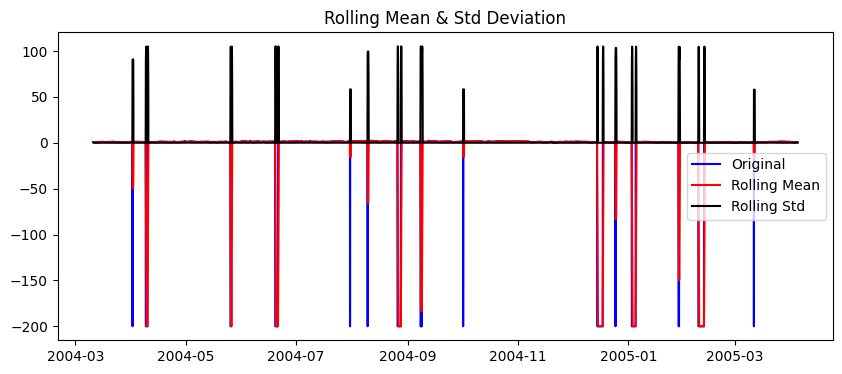

ADF Statistic: -11.234863884327174
p-value: 1.8681881907351443e-20
Critical Value 1%: -3.431050181732143
Critical Value 5%: -2.8618494362749733
Critical Value 10%: -2.5669347078446885
Stationary


In [ ]:
columns = df.columns
for col in columns:
    test_stationarity(df[col])


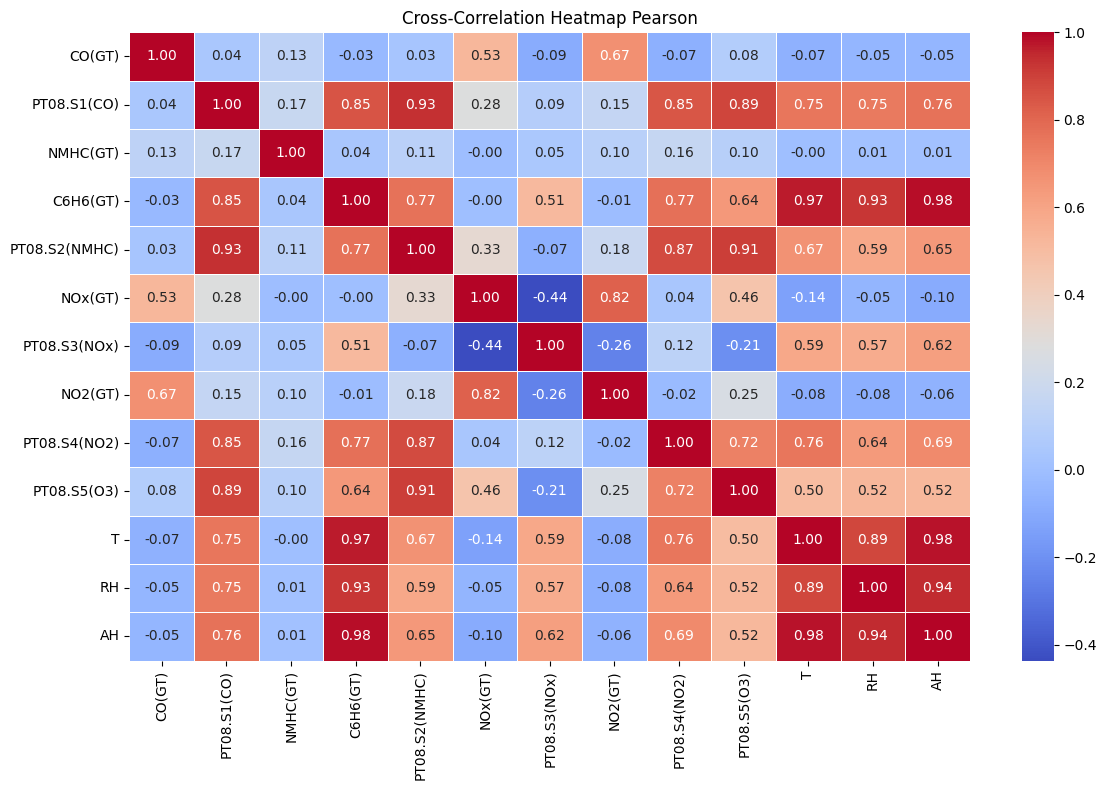

In [ ]:
# Drop index if it's numeric and part of the DataFrame
numeric_df = df.reset_index(drop=True).select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Cross-Correlation Heatmap Pearson')
plt.tight_layout()
plt.show()


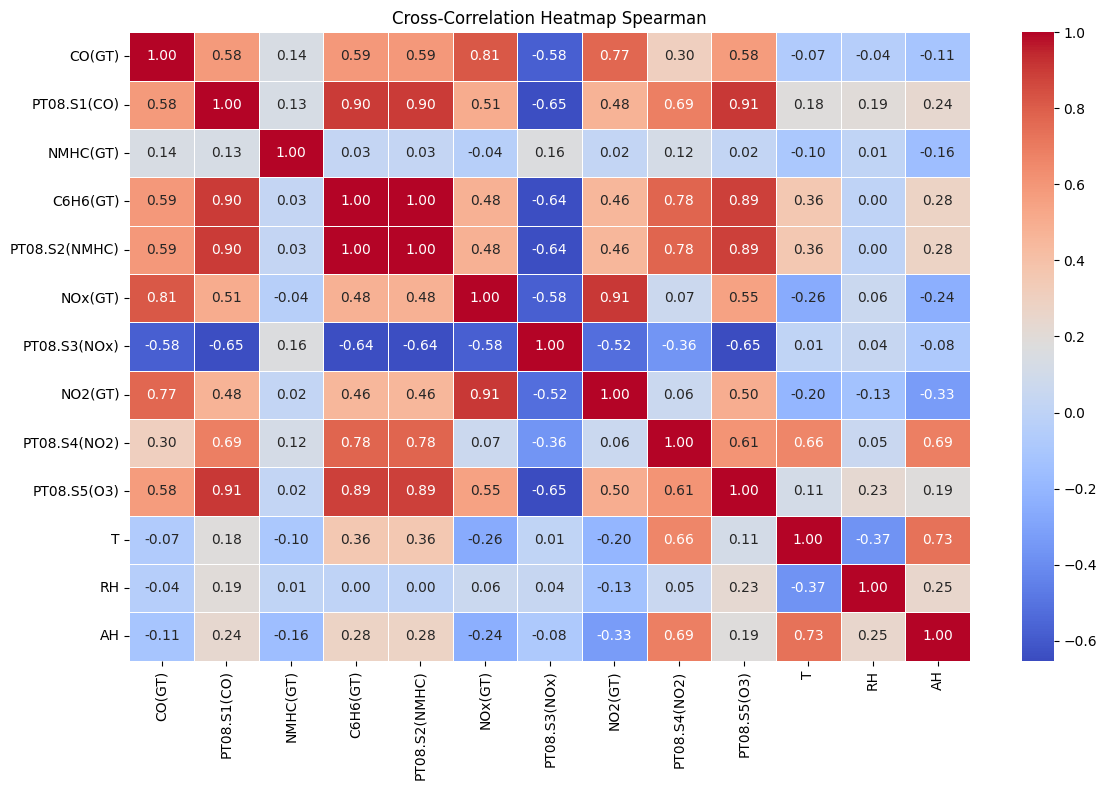

In [ ]:
# Drop index if it's numeric and part of the DataFrame
numeric_df = df.reset_index(drop=True).select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Cross-Correlation Heatmap Spearman')
plt.tight_layout()
plt.show()


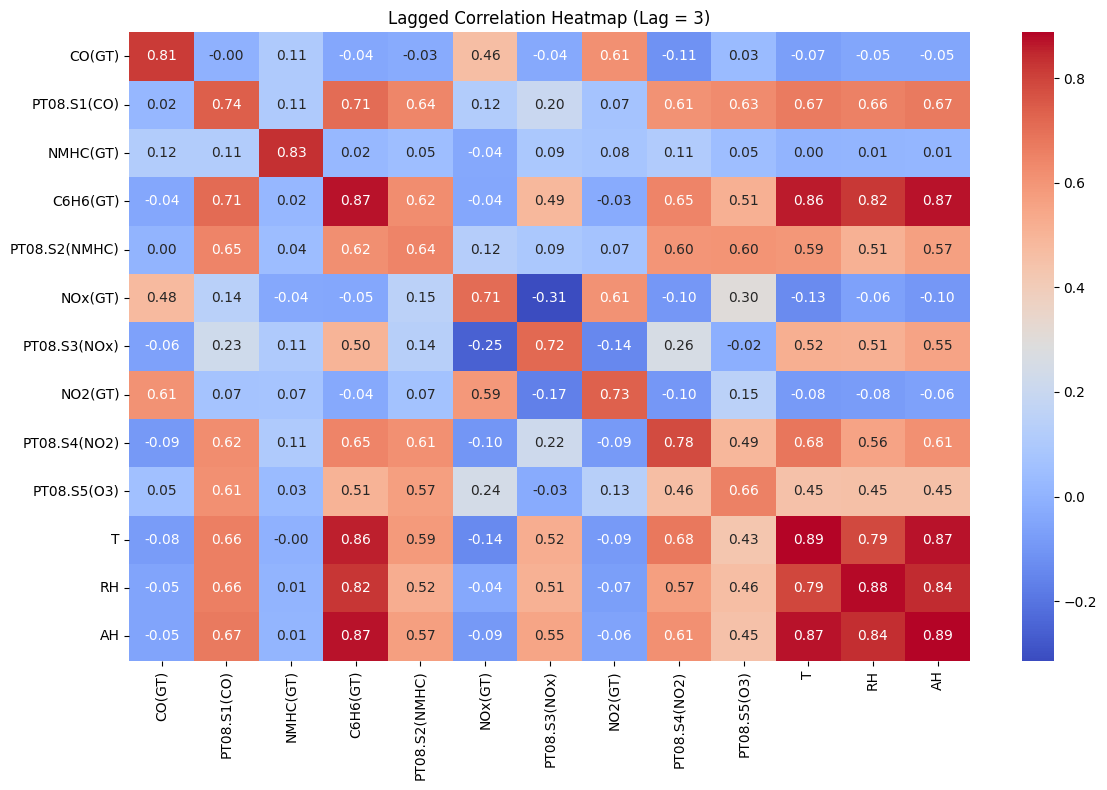

In [ ]:
# Parameters
max_lag = 10  # Choose how many time steps to lag (+/-)

# Function to compute lagged correlation between two series
def lagged_corr(x, y, lag=0):
    return x.shift(lag).corr(y)

# Create a lagged correlation matrix
def compute_lagged_correlation_matrix(df, max_lag):
    df = df.reset_index(drop=True)  # Drop the index if it's numeric
    features = df.columns
    corr_dict = {}

    for lag in range(-max_lag, max_lag + 1):
        lagged_corrs = pd.DataFrame(index=features, columns=features)
        for f1 in features:
            for f2 in features:
                lagged_corrs.loc[f1, f2] = lagged_corr(df[f1], df[f2], lag)
        corr_dict[lag] = lagged_corrs.astype(float)

    return corr_dict

# Compute lagged correlation matrices
numeric_df = df.select_dtypes(include='number').reset_index(drop=True)
lagged_corrs = compute_lagged_correlation_matrix(numeric_df, max_lag)

# Visualize correlation at a specific lag (e.g., lag = +3)
selected_lag = 3
plt.figure(figsize=(12, 8))
sns.heatmap(lagged_corrs[selected_lag], annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f'Lagged Correlation Heatmap (Lag = {selected_lag})')
plt.tight_layout()
plt.show()


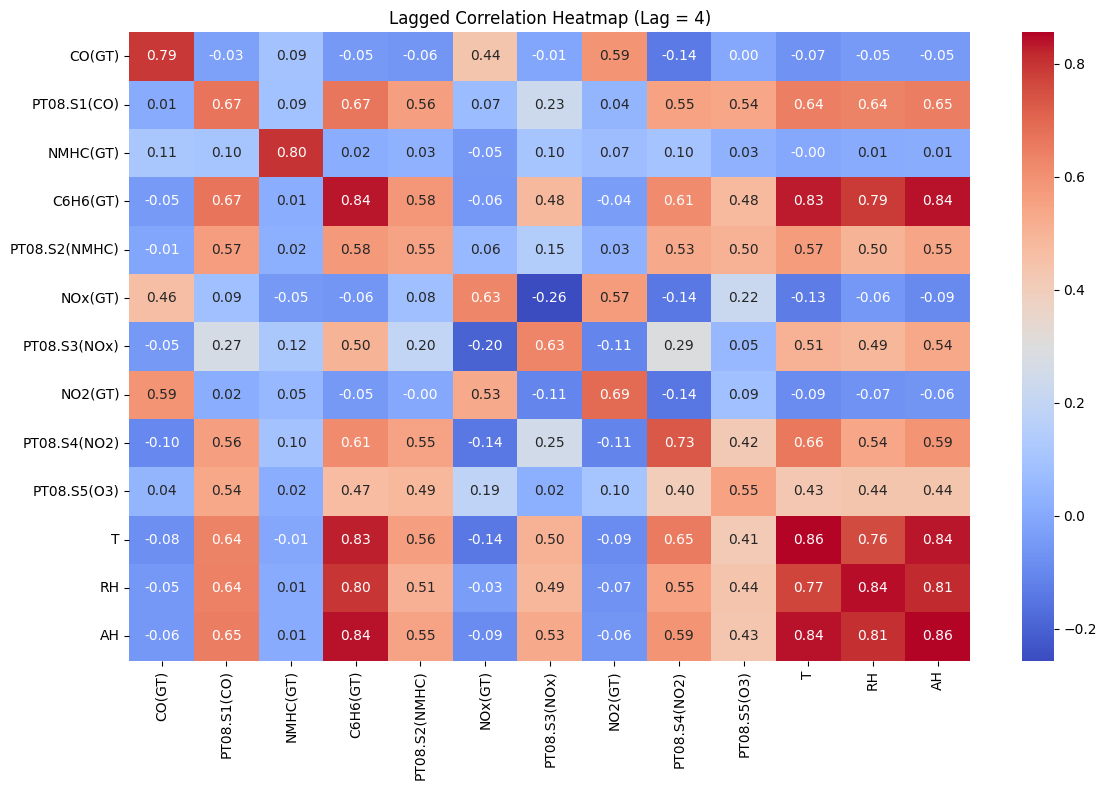

In [ ]:
selected_lag = 4
plt.figure(figsize=(12, 8))
sns.heatmap(lagged_corrs[selected_lag], annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f'Lagged Correlation Heatmap (Lag = {selected_lag})')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Target variable
target = 'NO2(GT)'
max_lag = 5

# Features excluding the target
variables = [col for col in df.columns if col != target]
results = []

# Run Granger causality test for each feature
for var in variables:
    test_result = grangercausalitytests(df[[target, var]].dropna(), maxlag=max_lag, verbose=False)
    for lag in range(1, max_lag + 1):
        p_value = round(test_result[lag][0]['ssr_ftest'][1], 4)
        results.append({'Feature': var, 'Lag': f'lag_{lag}', 'P-Value': p_value})

# Create a DataFrame with formatted results
gc_df = pd.DataFrame(results)

# Pivot to show lag as column and feature as row
pivot_df = gc_df.pivot(index='Feature', columns='Lag', values='P-Value').reset_index()

# Display result
print("Granger Causality Test P-values:")
print(pivot_df.to_string(index=False))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

Granger Causality Test P-values:
      Feature  lag_1  lag_2  lag_3  lag_4  lag_5
           AH 0.0966 0.2769 0.5664 0.7530 0.5715
     C6H6(GT) 0.4791 0.0000 0.0000 0.0000 0.0000
       CO(GT) 0.0000 0.0000 0.0000 0.0000 0.0000
     NMHC(GT) 0.0321 0.0001 0.0000 0.0000 0.0000
      NOx(GT) 0.0000 0.0000 0.0000 0.0000 0.0000
  PT08.S1(CO) 0.0246 0.0000 0.0000 0.0000 0.0000
PT08.S2(NMHC) 0.0336 0.0000 0.0000 0.0000 0.0000
 PT08.S3(NOx) 0.0013 0.0000 0.0000 0.0000 0.0000
 PT08.S4(NO2) 0.0200 0.0000 0.0000 0.0000 0.0000
  PT08.S5(O3) 0.0003 0.0000 0.0000 0.0000 0.0000
           RH 0.0586 0.5442 0.7305 0.7695 0.8537
            T 0.0083 0.0468 0.1468 0.2328 0.0808


In [ ]:
# List of selected features
selected_features = [
    'C6H6(GT)', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'PT08.S1(CO)',
    'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T','NO2(GT)'
]

# Select features along with index (assumes datetime is index)
selected_df = df[selected_features].copy()


In [ ]:
selected_df.head()

,C6H6(GT),CO(GT),NMHC(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,NO2(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,11.881723,2.6,150,166.0,1360.00,1045.50,1056.25,1692.00,1267.50,13.60,113.0
2004-03-10 19:00:00,9.397165,2.0,112,103.0,1292.25,954.75,1173.75,1558.75,972.25,13.30,92.0
2004-03-10 20:00:00,8.997817,2.2,88,131.0,1402.00,939.25,1140.00,1554.50,1074.00,11.90,114.0
2004-03-10 21:00:00,9.228796,2.2,80,172.0,1375.50,948.25,1092.00,1583.75,1203.25,11.00,122.0
2004-03-10 22:00:00,6.518224,1.6,51,131.0,1272.25,835.50,1205.00,1490.00,1110.00,11.15,116.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
selected_df[selected_features] = scaler.fit_transform(selected_df[selected_features])


In [ ]:

selected_df.rename(columns={'Datetime': 'ds', 'NO2(GT)': 'y'}, inplace=True)


In [ ]:
# Rename the index (if Datetime is set as index) or column to 'ds'
selected_df = selected_df.reset_index()  # if Datetime is index, this brings it back as a column
selected_df = selected_df.rename(columns={'Datetime': 'ds'})


In [ ]:
selected_df.head()

,ds,C6H6(GT),CO(GT),NMHC(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,y
0,2004-03-10 18:00:00,0.803369,0.956111,0.251980,0.217987,0.696506,0.515949,0.435782,0.635966,0.538977,0.873262,0.579952
1,2004-03-10 19:00:00,0.793949,0.953280,0.224622,0.180465,0.666257,0.478355,0.476541,0.591176,0.430539,0.872036,0.541041
2,2004-03-10 20:00:00,0.792434,0.954224,0.207343,0.197141,0.715258,0.471935,0.464834,0.589748,0.467909,0.866312,0.581805
3,2004-03-10 21:00:00,0.793310,0.954224,0.201584,0.221560,0.703427,0.475663,0.448183,0.599580,0.515380,0.862633,0.596628
4,2004-03-10 22:00:00,0.783033,0.951392,0.180706,0.197141,0.657328,0.428956,0.487382,0.568067,0.481131,0.863246,0.585510


In [ ]:
train = selected_df[:7110]
test = selected_df[7111:]


In [ ]:
train.shape, test.shape

((7110, 12), (2246, 12))

In [ ]:
from prophet import Prophet
# Step 2: Fit Prophet on training data
model = Prophet()
for col in train.columns:
    if col not in ['ds', 'y']:
        model.add_regressor(col)

model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8me6dbxq/wfhocqxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8me6dbxq/c_wg0m71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78990', 'data', 'file=/tmp/tmp8me6dbxq/wfhocqxs.json', 'init=/tmp/tmp8me6dbxq/c_wg0m71.json', 'output', 'file=/tmp/tmp8me6dbxq/prophet_model4cszdwvl/prophet_model-20250511144159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Step 3: Predict on test data
forecast = model.predict(test)

# Step 4: Compare predictions vs actuals
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['y'].values
y_pred = forecast['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 0.14
RMSE: 0.16


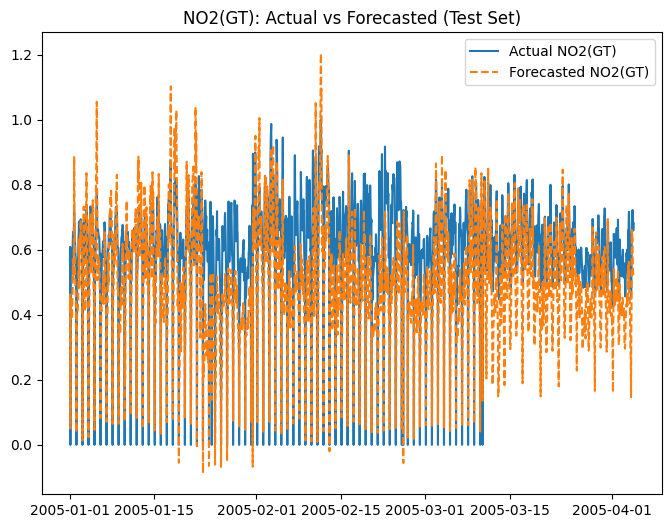

In [ ]:
plt.plot(test['ds'], y_true, label='Actual NO2(GT)')
plt.plot(test['ds'], y_pred, label='Forecasted NO2(GT)', linestyle='--')
plt.legend()
plt.title("NO2(GT): Actual vs Forecasted (Test Set)")
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Make sure your forecast dataframe from Prophet has 'yhat' and 'ds'
# Merge it with the actual values to compare

# If your original df has actual y values with 'ds' column
merged_df = pd.merge(selected_df[['ds', 'y']], forecast[['ds', 'yhat']], on='ds')

# Calculate R²
r2 = r2_score(merged_df['y'], merged_df['yhat'])

print(f'R² Score: {r2:.4f}')


R² Score: -0.1446


In [ ]:
selected_df = selected_df.reset_index()


In [ ]:
selected_df['year'] = selected_df['ds'].dt.year
selected_df['month'] = selected_df['ds'].dt.month
selected_df['day'] = selected_df['ds'].dt.day
selected_df['hour'] = selected_df['ds'].dt.hour
selected_df['minute'] = selected_df['ds'].dt.minute
selected_df['dayofweek'] = selected_df['ds'].dt.dayofweek


In [ ]:
selected_df = selected_df.drop(columns=['ds'])


In [ ]:
selected_df.head()

,index,C6H6(GT),CO(GT),NMHC(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,y,year,month,day,hour,minute,dayofweek
0,0,0.803369,0.956111,0.251980,0.217987,0.696506,0.515949,0.435782,0.635966,0.538977,0.873262,0.579952,2004,3,10,18,0,2
1,1,0.793949,0.953280,0.224622,0.180465,0.666257,0.478355,0.476541,0.591176,0.430539,0.872036,0.541041,2004,3,10,19,0,2
2,2,0.792434,0.954224,0.207343,0.197141,0.715258,0.471935,0.464834,0.589748,0.467909,0.866312,0.581805,2004,3,10,20,0,2
3,3,0.793310,0.954224,0.201584,0.221560,0.703427,0.475663,0.448183,0.599580,0.515380,0.862633,0.596628,2004,3,10,21,0,2
4,4,0.783033,0.951392,0.180706,0.197141,0.657328,0.428956,0.487382,0.568067,0.481131,0.863246,0.585510,2004,3,10,22,0,2


In [ ]:
train = selected_df[:7110]
test = selected_df[7111:]

In [ ]:
X_train = train.drop('y', axis=1)
y_train = train['y']

X_test = test.drop('y', axis=1)
y_test = test['y']

In [ ]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          7110 non-null   int64  
 1   C6H6(GT)       7110 non-null   float64
 2   CO(GT)         7110 non-null   float64
 3   NMHC(GT)       7110 non-null   float64
 4   NOx(GT)        7110 non-null   float64
 5   PT08.S1(CO)    7110 non-null   float64
 6   PT08.S2(NMHC)  7110 non-null   float64
 7   PT08.S3(NOx)   7110 non-null   float64
 8   PT08.S4(NO2)   7110 non-null   float64
 9   PT08.S5(O3)    7110 non-null   float64
 10  T              7110 non-null   float64
 11  year           7110 non-null   int32  
 12  month          7110 non-null   int32  
 13  day            7110 non-null   int32  
 14  hour           7110 non-null   int32  
 15  minute         7110 non-null   int32  
 16  dayofweek      7110 non-null   int32  
dtypes: float64(10), int32(6), int64(1)
memory usage: 777

In [ ]:
df = df.reset_index()


In [ ]:
# X_train['year'] = X_train['ds'].dt.year
# X_train['month'] = X_train['ds'].dt.month
# X_train['day'] = X_train['ds'].dt.day
# X_train['hour'] = X_train['ds'].dt.hour
# X_train['weekday'] = X_train['ds'].dt.weekday


# # Then drop the original datetime
# X_train = X_train.drop('ds', axis=1)


In [ ]:
# Do the same for X_test
# X_test['year'] = X_test['ds'].dt.year
# X_test['month'] = X_test['ds'].dt.month
# X_test['day'] = X_test['ds'].dt.day
# X_test['hour'] = X_test['ds'].dt.hour
# X_test['weekday'] = X_test['ds'].dt.weekday



# # Drop the original 'ds' column
# X_train.drop('ds', axis=1, inplace=True)
# X_test.drop('ds', axis=1, inplace=True)

In [ ]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1.0, 1.5]
}

# TimeSeriesSplit to preserve time order
tscv = TimeSeriesSplit(n_splits=5)

# Define the scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=tscv,
    scoring=scorer,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
# xgb_model = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

# # Define a narrower parameter grid for exhaustive search
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3, 0.5],
#     'min_child_weight': [1, 3, 5, 7],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0.5, 1.0, 1.5]
# }

# # TimeSeriesSplit to respect time-order
# tscv = TimeSeriesSplit(n_splits=5)

# # Define scoring metric
# scorer = make_scorer(mean_squared_error, greater_is_better=False)

# # Create GridSearchCV object
# grid_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring=scorer,
#     cv=tscv,
#     verbose=1,
#     n_jobs=-1
# )

# # Fit on training data
# grid_search.fit(X_train, y_train)

# # Best model and parameters
# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Use the best model from grid search (already trained on training data)
# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.7174
RMSE: 0.0780
MAE: 0.0595


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(verbose=0)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.7259
RMSE: 0.0768
MAE: 0.0581


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Example: reshape your data
# Let's assume X_raw is (samples, features) and y_raw is (samples,)
# Convert to supervised learning format

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)  # X_train: (samples, features)

# Create sequences
time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_train.values, time_steps)

# Reshape X_seq for LSTM (samples, timesteps, features)
X_seq = X_seq.reshape((X_seq.shape[0], time_steps, X_seq.shape[2]))

# Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, X_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_seq, y_seq, epochs=100, batch_size=32, validation_split=0.1)

# Prepare test data
X_test_scaled = scaler.transform(X_test)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, time_steps)

# Predict
y_pred = model.predict(X_test_seq)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_seq, y_pred))
print("Test RMSE:", rmse)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0419 - val_loss: 0.0160
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - val_loss: 0.0133
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - val_loss: 0.0144
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - val_loss: 0.0123
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - val_loss: 0.0110
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - val_loss: 0.0087
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0075 - val_loss: 0.0036
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - val_loss: 0.0072
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step